In [1]:
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from analysis.utils import optimise_model, plot_variable_importance, load_model, save_model, print_performance_measures, \
    plot_numeric_variable_importance

# Evaluate

Read the preprocessed data for this model and measure its performance on a 25%-test-split. Save the results to a file, for traceability.

In [2]:
df = pd.read_csv('../data/df_extensive_model_fs.csv', index_col=0)

X = df.drop('Value', axis=1)
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = load_model('extensive-model-xgb-fs')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print_performance_measures(X_test, y_test, y_test_pred, file='performance-extensive-model-fs.csv')

RMSE:		4808326.2737
R^2:		0.6529
Adj. R^2:	0.4795


# Predict

In [9]:
df = pd.read_csv('../data/df_extensive_model_fs_unfiltered.csv', index_col=0)  # read the data for the prediction
df_clean = pd.read_csv('../data/df_clean.csv', index_col=0)  # read all data

y = df["Value"]
X = df.drop("Value", axis=1)

results = pd.DataFrame(index=df_clean.index)  # prepare a dataframe for the results

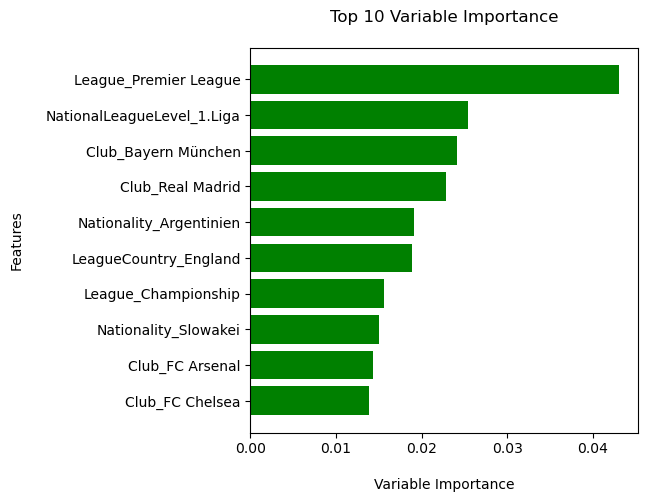

In [10]:
xgb_optimized = load_model('extensive-model-xgb-fs')
plot_variable_importance(xgb_optimized, X) # plot feature importances

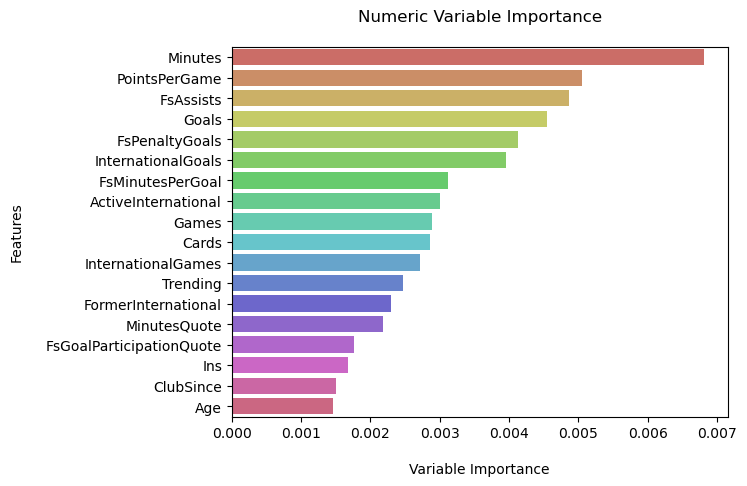

In [11]:
plot_numeric_variable_importance(xgb_optimized, X) # plot feature importances without dummies

In [12]:
y_pred_xgb = xgb_optimized.predict(X)  # predict the values
y_pred_xgb = pd.DataFrame(index=df.index, data=y_pred_xgb)
results = pd.merge(results, y_pred_xgb, left_index=True, right_index=True, how='inner')  # merge the results to the prepared dataframe
print_performance_measures(X, y, y_pred_xgb)

RMSE:		1700211.1315
R^2:		0.96
Adj. R^2:	0.9564


In [13]:
results.to_csv('../data/df_extensive_model_fs_results.csv') # save the predictions

# Model Optimisation

Read the data and separate X from y.

In [7]:
df = pd.read_csv('../data/df_extensive_model_fs.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)


Define a param distribution, fine-tune the model with the given parameters and save the best performing model.


In [8]:
%%timeit -r 1 -n 1

param_dist = {
    "learning_rate": uniform(0.01, 0.5),
    "max_depth": randint(1, 10),
    "n_estimators": randint(50, 500),
    "gamma": uniform(0, 5),
    "subsample": uniform(0.1, 0.9),
    "colsample_bytree": uniform(0.1, 0.9),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

xgb_optimized, cv_results = optimise_model(XGBRegressor(), param_dist, X, y)

save_model(xgb_optimized, 'extensive-model-xgb-fs')

cv_results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
52min 53s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
